In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ase.io.gaussian import read_gaussian_out
sns.set()
sns.set_context("talk")

In [7]:
opts = ["loose", "med", "tight"]

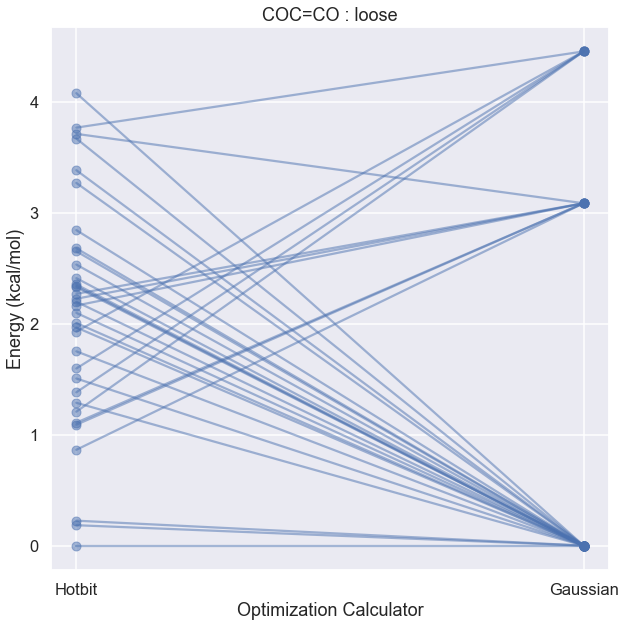

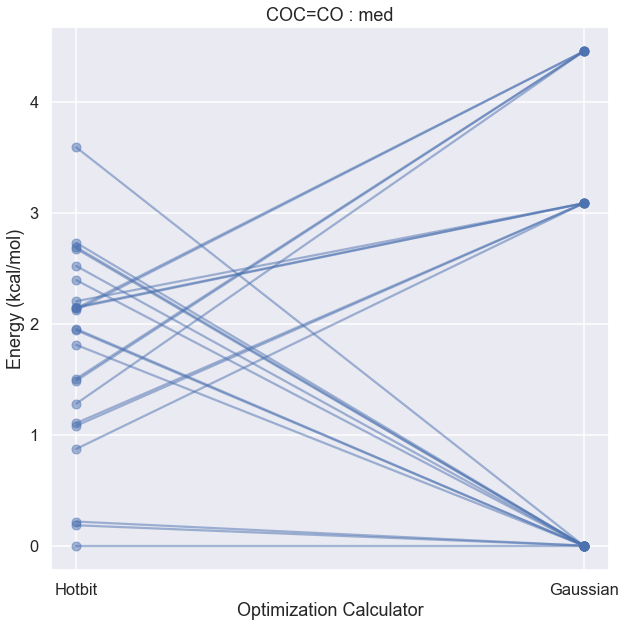

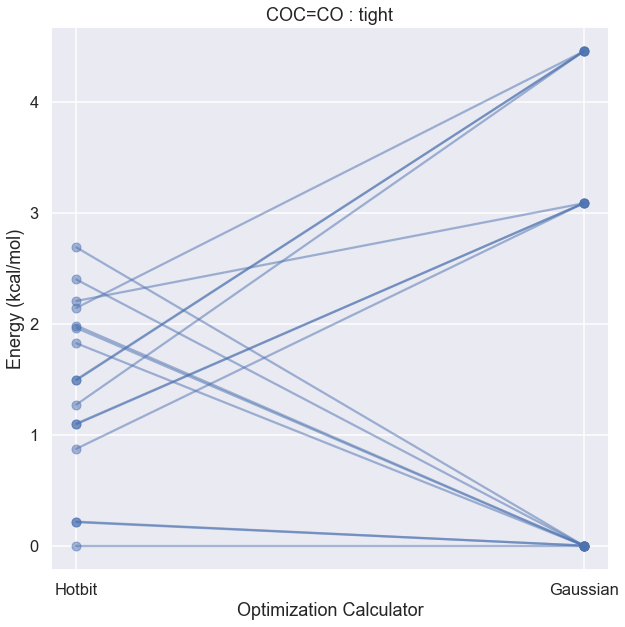

In [21]:

for opt_type in opts:
    results = pd.read_csv("{}/hotbit.csv".format(opt_type))
    results = results[["index", "hotbit"]]
    smiles = "COC=CO"
    directory = "{1}/species/{0}/conformers".format(smiles, opt_type)
    files = [f for f in os.listdir(directory) if f.endswith(".log")]
    gaussian_results = {}
    for fi in files:
        _, index = fi.strip(".log").split("_")
        index = int(index)
        atoms = read_gaussian_out(os.path.join(directory, fi))
        energy = atoms.get_potential_energy()
        gaussian_results[index] = energy
        forces = atoms.get_forces()
        
    results = results.join(pd.DataFrame(gaussian_results.values(), columns=["gaussian"])) / 0.043
    ax = (results - results.min())[["hotbit", "gaussian"]].T.plot(legend=False, c="b", marker="o", alpha=0.5, figsize=(10,10))
    #ax.plot([1,1], c="r")
    ax.set_xticks([0.0,1.0])
    ax.set_xticklabels(["Hotbit", "Gaussian"])
    ax.set_ylabel("Energy (kcal/mol)")
    ax.set_xlabel("Optimization Calculator")
    ax.set_title("{} : {}".format(smiles, opt_type))




Error with CCC+[O]O_[CH2]CC+OO_reverse_shell_0.log
Error with CCC+[O]O_[CH2]CC+OO_forward_shell_4.log
Error with CCC+[O]O_[CH2]CC+OO_forward_2.log
Error with CCC+[O]O_[CH2]CC+OO_forward_1.log
Error with CCC+[O]O_[CH2]CC+OO_reverse_shell_0.log
Error with CCC+[O]O_[CH2]CC+OO_forward_4.log
Error with CCC+[O]O_[CH2]CC+OO_forward_6.log
Error with CCC+[O]O_[CH2]CC+OO_forward_2.log
Error with CCC+[O]O_[CH2]CC+OO_forward_3.log
Error with CCC+[O]O_[CH2]CC+OO_forward_1.log
Error with CCC+[O]O_[CH2]CC+OO_forward_0.log
Error with CCC+[O]O_[CH2]CC+OO_reverse_shell_0.log
Error with CCC+[O]O_[CH2]CC+OO_forward_4.log
Error with CCC+[O]O_[CH2]CC+OO_forward_2.log
Error with CCC+[O]O_[CH2]CC+OO_forward_1.log


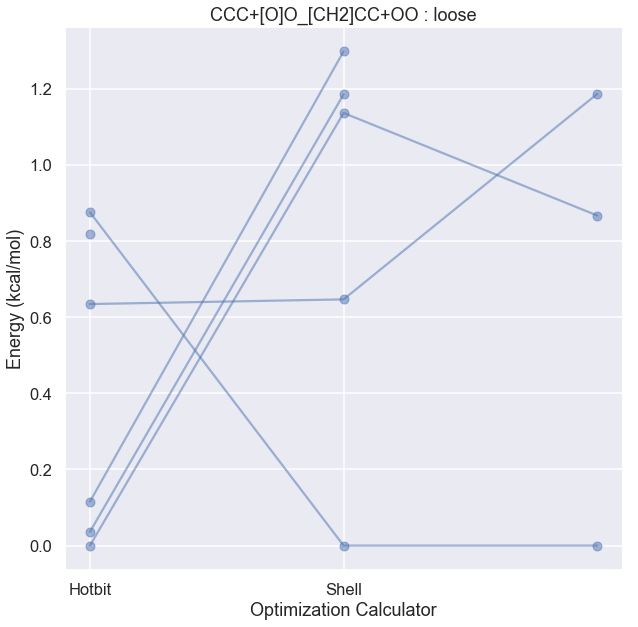

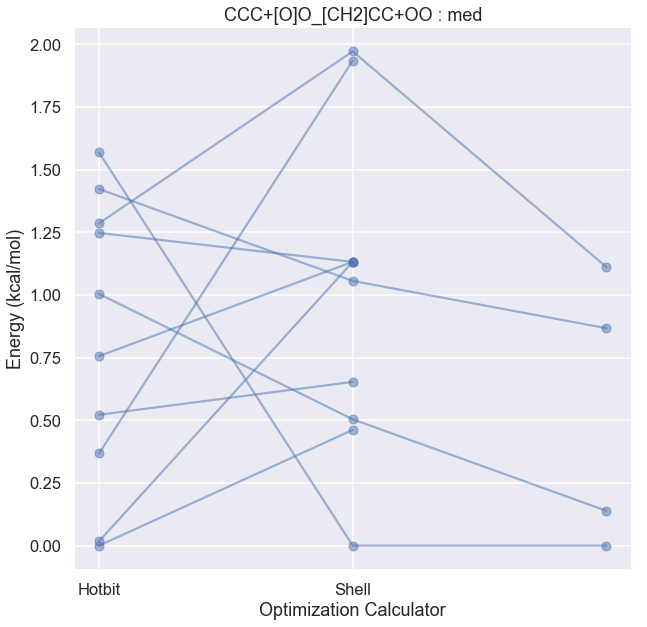

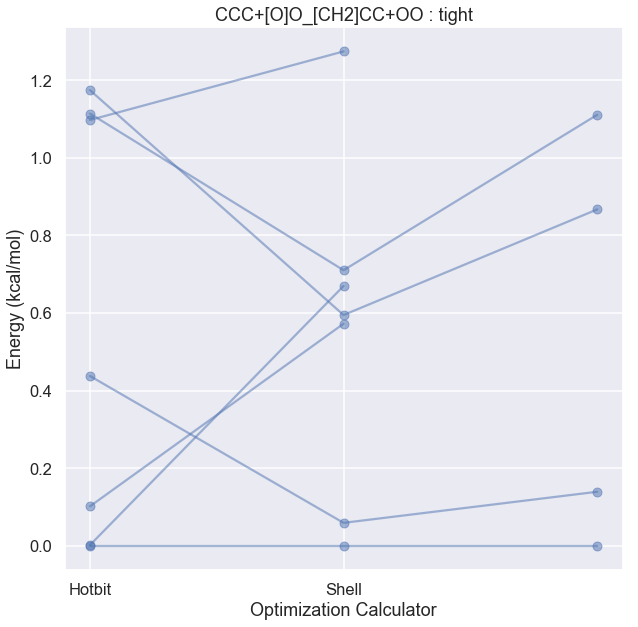

In [40]:

for opt_type in opts:
    results = pd.read_csv("{}/hotbit-ts.csv".format(opt_type))
    results = results[["index", "hotbit"]]
    smiles = "CCC+[O]O_[CH2]CC+OO"
    directory = "{1}/ts/{0}/conformers".format(smiles, opt_type)
    files = [f for f in os.listdir(directory) if f.endswith(".log")]
    gaussian_results = {
        "shell":{},
        "overall":{}
    }
    for fi in files:
        if "shell" in fi:
            _, _, _, t, index = fi.strip(".log").split("_")
        else:
            _, _, _, index = fi.strip(".log").split("_") 
            t = "overall"
        index = int(index)
        try:
            atoms = read_gaussian_out(os.path.join(directory, fi))
            energy = atoms.get_potential_energy()
            gaussian_results[t][index] = energy
            forces = atoms.get_forces()
        except:
            print "Error with {}".format(fi)
        
    results = results.join(pd.DataFrame(gaussian_results)) / 0.043
    ax = (results - results.min())[["hotbit", "shell", "overall"]].T.plot(legend=False, c="b", marker="o", alpha=0.5, figsize=(10,10))
    #ax.plot([1,1], c="r")
    ax.set_xticks([0.0,1.0])
    ax.set_xticklabels(["Hotbit", "Shell", "Overall"])
    ax.set_ylabel("Energy (kcal/mol)")
    ax.set_xlabel("Optimization Calculator")
    ax.set_title("{} : {}".format(smiles, opt_type))
    #ax.set_ylim([-1,10])




In [39]:
(results - results.min())[["hotbit", "shell", "overall"]]

,hotbit,shell,overall
0,0.000000,0.000000,0.000000
1,0.001223,0.669653,NaN
2,0.101212,0.572325,NaN
3,0.437496,0.058663,0.138841
4,1.097706,1.274695,NaN
5,1.114469,0.710280,1.111174
6,1.174767,0.594727,0.867157
